In [14]:
import pandas as pd

In [15]:
df = pd.read_csv("customer_churn_data.csv")

In [16]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [18]:
df.isna().sum().sum()

297

In [19]:
df["InternetService"] = df["InternetService"].fillna("")

In [20]:
df.isna().sum().sum()

0

In [21]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [22]:
df.duplicated().sum()

0

In [23]:
df.head()


,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [24]:
numeric_columns_data = df.select_dtypes(include=['number'])

In [25]:

numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [26]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,,4465.56,No,Yes


<function matplotlib.pyplot.show(close=None, block=None)>

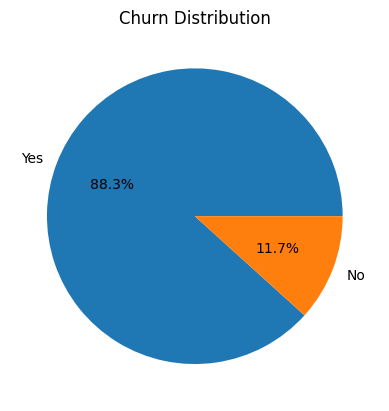

In [27]:
import matplotlib.pyplot as plt
df["Churn"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Churn Distribution")
plt.ylabel("")
plt.show

In [28]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [29]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

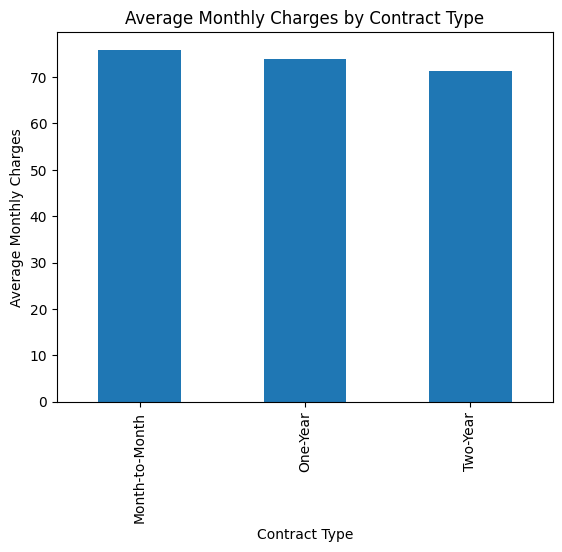

In [30]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind='bar')
plt.ylabel("Average Monthly Charges")
plt.title("Average Monthly Charges by Contract Type")
plt.xlabel("Contract Type")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

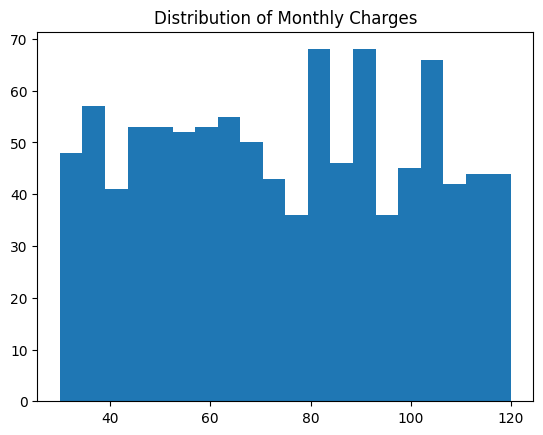

In [31]:
plt.hist(df["MonthlyCharges"], bins=20)
plt.title("Distribution of Monthly Charges")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

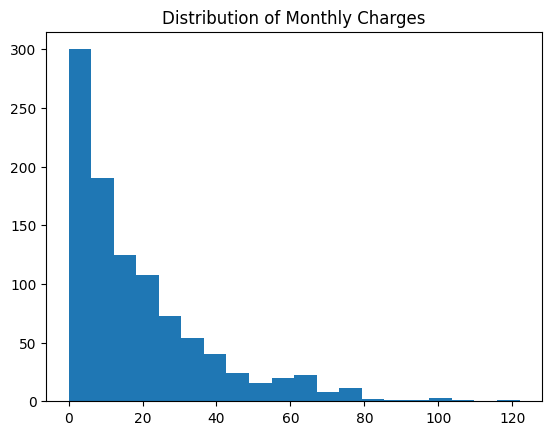

In [32]:
plt.hist(df["Tenure"], bins=20)
plt.title("Distribution of Monthly Charges")
plt.show

In [33]:
df.head(1)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes


In [34]:
y = df[["Churn"]]
x = df[["Age","MonthlyCharges","Tenure","Gender"]]


In [35]:
x["Gender"] = x["Gender"].apply(lambda x: 1 if x=="Female" else 0)

In [36]:
x.head()

,Age,MonthlyCharges,Tenure,Gender
0,49,88.35,4,0
1,43,36.67,0,0
2,51,63.79,2,1
3,60,102.34,8,1
4,42,69.01,32,0


In [37]:
type(x["Gender"][0])

numpy.int64

In [38]:
y.head(2)

,Churn
0,Yes
1,Yes


In [39]:
y["Churn"] = y["Churn"].apply(lambda x: 1 if x=="Yes" else 0)

In [40]:
type(y["Churn"][0])

numpy.int64

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
x

,Age,MonthlyCharges,Tenure,Gender
0,49,88.35,4,0
1,43,36.67,0,0
2,51,63.79,2,1
3,60,102.34,8,1
4,42,69.01,32,0
...,...,...,...,...
995,42,37.14,41,0
996,62,80.93,9,0
997,51,111.72,15,1
998,39,65.67,68,0


In [43]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)

In [44]:
import joblib
joblib.dump(scalar, "scaler.pkl")

['scaler.pkl']

In [45]:
x_test = scalar.transform(x_test)

In [46]:
x_train

array([[-0.27936177,  0.92037124,  2.28080878, -1.06725697],
       [ 0.02664838,  1.12221019,  0.11295321,  0.93698147],
       [-0.38136516, -1.00540975,  0.69457299, -1.06725697],
       ...,
       [ 0.23065515,  0.16723494,  1.91068709, -1.06725697],
       [ 0.02664838,  1.6909211 , -0.36291753,  0.93698147],
       [-0.38136516, -0.87045469,  0.06007868,  0.93698147]])

In [47]:
x_test

array([[ 0.53666531,  1.17603391, -0.99741184,  0.93698147],
       [ 0.94467885,  1.77798888, -0.89166279,  0.93698147],
       [-1.91141594,  1.7237694 , -0.41579205, -1.06725697],
       [-0.58537193,  1.54251011,  0.37732584,  0.93698147],
       [-1.19739224, -0.76913946, -0.68016468, -1.06725697],
       [ 0.94467885, -0.79051064, -0.52154111, -1.06725697],
       [-0.99338547,  1.03276783,  0.74744752,  0.93698147],
       [-0.99338547, -1.56937151,  0.32445131, -1.06725697],
       [ 0.6386687 , -1.7114503 ,  0.06007868, -1.06725697],
       [-0.7893787 ,  0.93818056,  3.3382993 ,  0.93698147],
       [-0.48336854, -1.57768253, -0.99741184,  0.93698147],
       [ 0.02664838, -0.81465216,  0.21870226,  0.93698147],
       [ 0.84267547,  0.46089082, -0.94453732,  0.93698147],
       [-0.68737531,  1.59277197,  0.21870226,  0.93698147],
       [ 0.23065515, -1.68295539, -0.52154111,  0.93698147],
       [-0.89138208, -1.09247753, -0.25716848, -1.06725697],
       [ 0.12865177, -1.

In [48]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print("Accuracy: {}".format(accuracy_score(y_test, predictions)))

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [51]:
import warnings
warnings.filterwarnings("ignore")
log_model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [52]:
log_model.predict([[40,0,20,80]])[0]

0

In [53]:
y_pred = log_model.predict(x_test)

In [54]:
y_test

,Churn
521,1
737,1
740,1
660,1
411,1
...,...
408,1
332,1
208,1
613,1


In [55]:
modelperformance(y_pred)

Accuracy: 0.885


In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

In [58]:
from sklearn.model_selection import GridSearchCV
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [59]:
gridkn.fit(x_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,9


In [60]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [61]:
y_pred = gridkn.predict(x_test)

In [62]:
modelperformance(y_pred)

Accuracy: 0.88


In [63]:
from sklearn.svm import SVC

In [64]:
svm = SVC()

In [66]:
param_grid = {
    'C': [0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

In [67]:
gridsvc = GridSearchCV(SVC(), param_grid, cv=5)

In [68]:
gridsvc.fit(x_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.01


In [69]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [71]:
y_pred = gridsvc.predict(x_test)

In [72]:
modelperformance(y_pred)

Accuracy: 0.885


In [73]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [80]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [81]:
grid_tree.fit(x_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [82]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'splitter': 'random'}

In [83]:
y_pred = grid_tree.predict(x_test)

In [84]:
modelperformance(y_pred)

Accuracy: 0.865


In [85]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [86]:
param_grid = {
    'n_estimators': [32,64,128,256],
    'max_features': [2,3,4],
    'bootstrap': [True, False]
}

In [87]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv=5)
grid_rfc.fit(x_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_features': [2, 3, ...], 'n_estimators': [32, 64, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,128


In [88]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128}

In [90]:
y_pred = grid_rfc.predict(x_test)

In [91]:
modelperformance(y_pred)

Accuracy: 0.845


In [92]:
best_model = gridsvc.best_estimator_

In [93]:

joblib.dump(best_model, "model.pkl")

['model.pkl']

In [94]:
x.columns

Index(['Age', 'MonthlyCharges', 'Tenure', 'Gender'], dtype='object')

In [95]:
from sklearn.svm import SVC

# Enable probability output for SVC
svm = SVC(probability=True)

param_grid = {
    'C': [0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

from sklearn.model_selection import GridSearchCV
gridsvc = GridSearchCV(svm, param_grid, cv=5)
gridsvc.fit(x_train, y_train)

print("Best Parameters:", gridsvc.best_params_)

y_pred = gridsvc.predict(x_test)
modelperformance(y_pred)

# Save the best SVC model with probability support
best_model = gridsvc.best_estimator_
import joblib
joblib.dump(best_model, "model.pkl")
print("✅ SVC Model (with probability=True) saved as model.pkl")


Best Parameters: {'C': 0.01, 'kernel': 'linear'}
Accuracy: 0.885
✅ SVC Model (with probability=True) saved as model.pkl
